In [2]:
! pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
! pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/57/ed/f607ebf69f87bcce2e3fa329bd78da8cafd3d51190a19d58012d2d7f2252/scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/ed/6f/ba2b2f14391291dd47d17da78c3ee644fb3a2fd6bddde664381c1968eda9/scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata
  Using cached scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ----


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CARGA DE DATOS

In [2]:
df = pd.read_csv('../../data/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
from data_util import calc_missing
calc_missing(df)

bill_length_mm 2 / 344 0.58 %
bill_depth_mm 2 / 344 0.58 %
flipper_length_mm 2 / 344 0.58 %
body_mass_g 2 / 344 0.58 %
sex 11 / 344 3.20 %


## IMPUTAR VALORES FALTANTES

In [ ]:
# df.dropna(inplace=True)

In [3]:
bill_length_mm_median = df['bill_length_mm'].median()
print(bill_length_mm_median)
df['bill_length_mm'] = df['bill_length_mm'].fillna(bill_length_mm_median)

44.45


In [9]:
calc_missing(df)

bill_depth_mm 2 / 344 0.58 %
flipper_length_mm 2 / 344 0.58 %
body_mass_g 2 / 344 0.58 %
sex 11 / 344 3.20 %


In [4]:
col_to_fill = 'bill_depth_mm'
df[col_to_fill] = df[col_to_fill].fillna(df[col_to_fill].median())

In [5]:
col_to_fill = 'flipper_length_mm'
df[col_to_fill] = df[col_to_fill].fillna(df[col_to_fill].median())

In [6]:
col_to_fill = 'body_mass_g'
df[col_to_fill] = df[col_to_fill].fillna(df[col_to_fill].median())

In [7]:
col_to_fill = 'sex'
df[col_to_fill] = df[col_to_fill].fillna(df[col_to_fill].mode()[0])

In [14]:
calc_missing(df)

Cuando veamos preprocesados y pipelines en Scikit Learn se puede utilizar KNNImputer o IterativeImputer para rellenar los nulos de una manera más sofisticada.

## CODIFICAR CATEGÓRICOS A NUMÉRICOS (ENCODING)

In [8]:
df = pd.get_dummies(df)
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.10,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.50,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.30,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
3,44.45,17.3,197.0,4050.0,True,False,False,False,False,True,False,True
4,36.70,19.3,193.0,3450.0,True,False,False,False,False,True,True,False


In [12]:
df['species_Adelie'] = df['species_Adelie'].astype(int)
df.tail(20)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
324,47.30,13.8,216.0,4725.0,0,False,True,True,False,False,False,True
325,46.80,16.1,215.0,5500.0,0,False,True,True,False,False,False,True
326,41.70,14.7,210.0,4700.0,0,False,True,True,False,False,True,False
327,53.40,15.8,219.0,5500.0,0,False,True,True,False,False,False,True
328,43.30,14.0,208.0,4575.0,0,False,True,True,False,False,True,False
329,48.10,15.1,209.0,5500.0,0,False,True,True,False,False,False,True
330,50.50,15.2,216.0,5000.0,0,False,True,True,False,False,True,False
331,49.80,15.9,229.0,5950.0,0,False,True,True,False,False,False,True
332,43.50,15.2,213.0,4650.0,0,False,True,True,False,False,True,False
333,51.50,16.3,230.0,5500.0,0,False,True,True,False,False,False,True


## EDAs: univariante, bivariante, multivariante

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

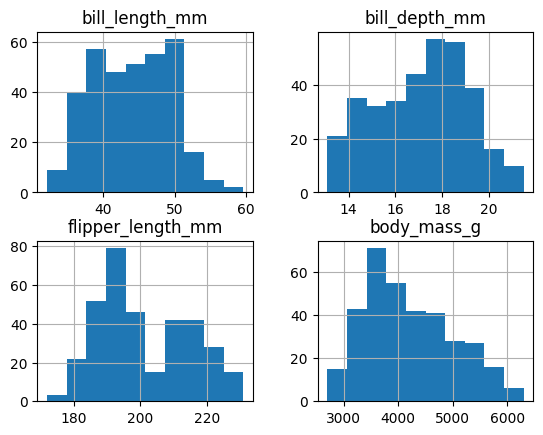

In [23]:
df.hist()

* dislot, catplot, boxplot, violinplot, rugplot, heatmap

## OBTENER X, y

X: bill_length_mm (Regresión lineal simple)

X: bill_length_mm, bill_depth_mm, flipper_length_mm, ... (R. L. múltiple)

y: la variable que queremos predecir: body_mass_g


X en mayúscula porque tiene 2 dimensiones, es un dataframe.

y en minúscula porque tiene 1 dimensión, es una columna de pandas o array de numpy.

In [ ]:
# regresión lineal simple:
#X = df[['bill_length_mm']]

In [25]:
# regresión lineal múltiple, eliminamos la columna a predecir
X = df.drop('body_mass_g', axis=1)
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.10,18.7,181.0,True,False,False,False,False,True,False,True
1,39.50,17.4,186.0,True,False,False,False,False,True,True,False
2,40.30,18.0,195.0,True,False,False,False,False,True,True,False
3,44.45,17.3,197.0,True,False,False,False,False,True,False,True
4,36.70,19.3,193.0,True,False,False,False,False,True,True,False


In [28]:
y = df[['body_mass_g']]
y.head()

,body_mass_g
0,3750.0
1,3800.0
2,3250.0
3,4050.0
4,3450.0


## PARTICIONADO DE DATOS

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
# random_state asegura la reproducibilidad, es decir, que si lo ejecutas más de una vez particiona igual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
66,35.5,16.2,195.0,True,False,False,True,False,False,True,False
229,46.8,15.4,215.0,False,False,True,True,False,False,False,True
7,39.2,19.6,195.0,True,False,False,False,False,True,False,True
140,40.2,17.1,193.0,True,False,False,False,True,False,True,False
323,49.1,15.0,228.0,False,False,True,True,False,False,False,True


In [34]:
y_train.head()

,body_mass_g
66,3350.0
229,5150.0
7,4675.0
140,3400.0
323,5500.0


## MODELADO

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## EVALUAR RESULTADOS

In [37]:
y_pred = model.predict(X_test)
# Comparar y_pred (predicciones del modelo) con y_test (valores reales)

In [41]:
type(y_pred)

numpy.ndarray

In [39]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"mae: {mae}") # El modelo se equivoca de media 249 gramos de peso
# Más cercano a 0 es mejor


mae: 249.0607032274841


In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

98440.61916017163

In [52]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8411903754357317

In [42]:
residuos = y_test - y_pred
residuos

,body_mass_g
194,-425.520134
157,477.962688
225,-89.382152
208,-0.979786
318,9.082915
...,...
321,-196.271643
172,579.999240
73,-37.816631
76,206.454789


In [50]:
residuos.mean()
# cuanto más cercano a 0 mejor

body_mass_g    34.852385
dtype: float64

In [43]:
X_test['error'] = residuos

In [45]:
X_test['prediction'] = y_pred

In [47]:
X_test['real'] = y_test

In [48]:
X_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE,error,prediction,real
194,50.9,19.1,196.0,False,True,False,False,True,False,False,True,-425.520134,3975.520134,3550.0
157,45.2,17.8,198.0,False,True,False,False,True,False,True,False,477.962688,3472.037312,3950.0
225,46.5,13.5,210.0,False,False,True,True,False,False,True,False,-89.382152,4639.382152,4550.0
208,45.2,16.6,191.0,False,True,False,False,True,False,True,False,-0.979786,3250.979786,3250.0
318,48.4,14.4,203.0,False,False,True,True,False,False,True,False,9.082915,4615.917085,4625.0


In [55]:
import numpy as np

y_pred_1d = np.ravel(y_pred)

In [58]:
residuos_1d = np.ravel(residuos)

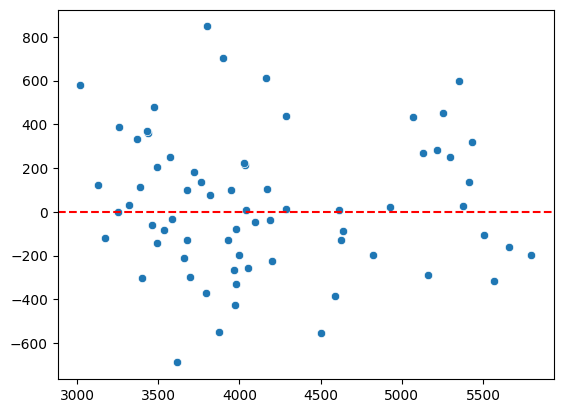

In [60]:
sns.scatterplot(x=y_pred_1d, y=residuos_1d)
plt.axhline(y=0, color='r', linestyle='--')

## ENTRENAR SIN PARTICIONAMIENTO

Una vez desarrollado y optimizado el modelo y los datos, se puede plantear volver hacer el entrenamiento pero esta vez con todos los datos, es deicr, con toda la X y.

Luego en producción recolectar los nuevos datos de entrada (X) que vayan llegando y sobre los cuales el modelo hace predicciones (y).